# Steps
1. Import Training csv
2. Drop benign data
3. Setup autogluon
4. Train non persistent model
5. Test non persistent model
6. Check leaderboard
7. Check feature importance

In [23]:
unraveled_features = [
    'Label',
    "expiration_id",
    # "src_ip",
    # "src_mac",
    # "src_oui",
    "src_port",
    # "dst_ip",
    # "dst_mac",
    # "dst_oui",
    "dst_port",
    "protocol",
    "ip_version",
    "vlan_id",
    "tunnel_id",
    "bidirectional_first_seen_ms",
    "bidirectional_last_seen_ms",
    "bidirectional_duration_ms",
    "bidirectional_packets",
    "bidirectional_bytes",
    "src2dst_first_seen_ms",
    "src2dst_last_seen_ms",
    "src2dst_duration_ms",
    "src2dst_packets",
    "src2dst_bytes",
    "dst2src_first_seen_ms",
    "dst2src_last_seen_ms",
    "dst2src_duration_ms",
    "dst2src_packets",
    "dst2src_bytes",
    "bidirectional_min_ps",
    "bidirectional_mean_ps",
    "bidirectional_stddev_ps",
    "bidirectional_max_ps",
    "src2dst_min_ps",
    "src2dst_mean_ps",
    "src2dst_stddev_ps",
    "src2dst_max_ps",
    "dst2src_min_ps",
    "dst2src_mean_ps",
    "dst2src_stddev_ps",
    "dst2src_max_ps",
    "bidirectional_min_piat_ms",
    "bidirectional_mean_piat_ms",
    "bidirectional_stddev_piat_ms",
    "bidirectional_max_piat_ms",
    "src2dst_min_piat_ms",
    "src2dst_mean_piat_ms",
    "src2dst_stddev_piat_ms",
    "src2dst_max_piat_ms",
    "dst2src_min_piat_ms",
    "dst2src_mean_piat_ms",
    "dst2src_stddev_piat_ms",
    "dst2src_max_piat_ms",
    "bidirectional_syn_packets",
    "bidirectional_cwr_packets",
    "bidirectional_ece_packets",
    "bidirectional_urg_packets",
    "bidirectional_ack_packets",
    "bidirectional_psh_packets",
    "bidirectional_rst_packets",
    "bidirectional_fin_packets",
    "src2dst_syn_packets",
    "src2dst_cwr_packets",
    "src2dst_ece_packets",
    "src2dst_urg_packets",
    "src2dst_ack_packets",
    "src2dst_psh_packets",
    "src2dst_rst_packets",
    "src2dst_fin_packets",
    "dst2src_syn_packets",
    "dst2src_cwr_packets",
    "dst2src_ece_packets",
    "dst2src_urg_packets",
    "dst2src_ack_packets",
    "dst2src_psh_packets",
    "dst2src_rst_packets",
    "dst2src_fin_packets",
    "application_name",
    "application_category_name",
    "application_is_guessed",
    "requested_server_name",
    "client_fingerprint",
    "server_fingerprint",
    "user_agent",
    "content_type"
]

# Imports

In [11]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import seaborn as sns
import matplotlib.pyplot as plt

# Import Training data

In [14]:
unraveled_train_df = pd.read_csv("TRAIN_DFs/unraveled_train.csv")
no_benign = unraveled_train_df['Label'] != 'Benign'
unraveled_train_df = unraveled_train_df[no_benign]
unraveled_train_df = unraveled_train_df.sample(frac=1, random_state=29)

C:\Users\zac\AppData\Local\Temp\ipykernel_8764\1669385615.py:1: DtypeWarning: Columns (89) have mixed types. Specify dtype option on import or set low_memory=False.
  unraveled_train_df = pd.read_csv("TRAIN_DFs/unraveled_train.csv")


<Axes: >

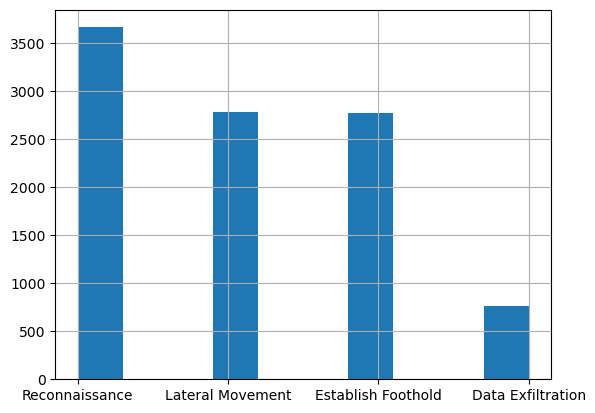

In [15]:
unraveled_train_df['Label'].hist()

<Axes: >

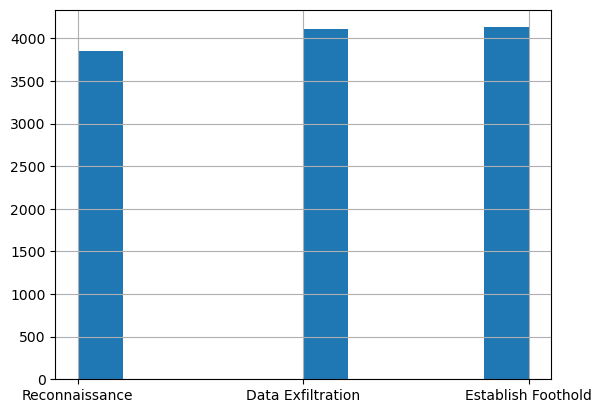

In [16]:
testbed_train_df = pd.read_csv('TRAIN_DFs/persistent_testbed_train.csv')
testbed_train_df['Label'].hist()

# Import Testing dfs

C:\Users\zac\AppData\Local\Temp\ipykernel_8764\1161631879.py:1: DtypeWarning: Columns (89) have mixed types. Specify dtype option on import or set low_memory=False.
  unraveled_test_df = pd.read_csv('TEST_DFs/unraveled_test.csv')


<Axes: >

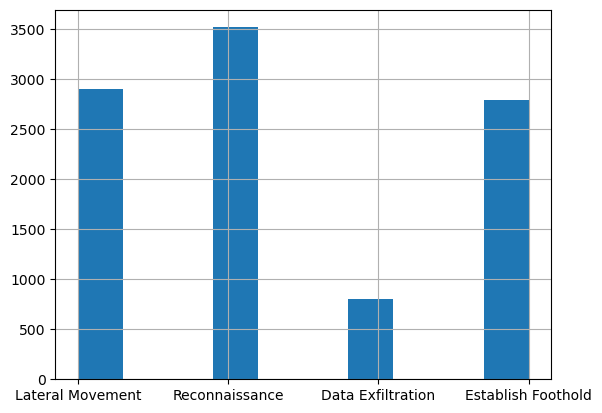

In [19]:
unraveled_test_df = pd.read_csv('TEST_DFs/unraveled_test.csv')
unraveled_test_df = unraveled_test_df[unraveled_test_df['Label'] != 'Benign']
unraveled_test_df['Label'].hist()

<Axes: >

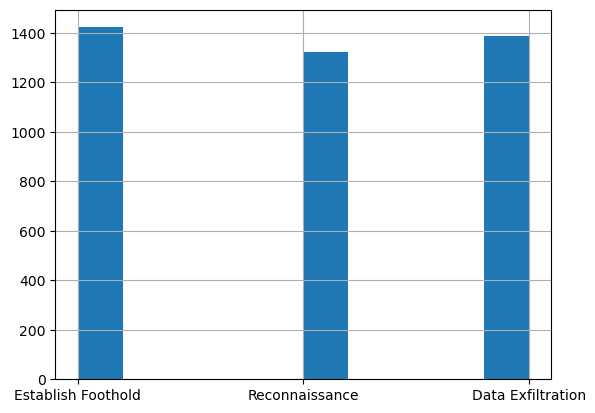

In [20]:
testbed_test_df = pd.read_csv('TEST_DFs/persistent_testbed_test.csv')
testbed_test_df['Label'].hist()

# Setup Autogluon

In [24]:
stats = pd.DataFrame(columns=['train_rows', 'mcc', 'accuracy', 'balanced_accuracy', 'testbed_accuracy', 'best_model'])
for train_rows in range(2000, 12000, 2000):
    print(train_rows)
    predictor = TabularPredictor(label='Label', eval_metric= 'mcc').fit(presets='medium', train_data=unraveled_train_df[:train_rows][unraveled_features], fit_weighted_ensemble=False, included_model_types=['NN_TORCH', 'GBM', 'XGB', 'FASTAI', 'RF', 'XT', 'KNN'])
    evaluation = predictor.evaluate(unraveled_test_df)
    leaderboard = predictor.leaderboard(unraveled_test_df)

    evaluation_testbed = predictor.evaluate(testbed_test_df)

    new_row = {'mcc': evaluation['mcc'], 'accuracy':evaluation['accuracy'], 'train_rows':train_rows, 'balanced_accuracy': evaluation['balanced_accuracy'], 'best_model': leaderboard.iloc[0]['model'], 'testbed_accuracy': evaluation_testbed['accuracy']}
    stats.loc[len(stats)] = new_row
    print(stats)

No path specified. Models will be saved in: "AutogluonModels\ag-20250711_061524"
Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
Memory Avail:       52.95 GB / 63.72 GB (83.1%)
Disk Space Avail:   628.23 GB / 1906.98 GB (32.9%)
Presets specified: ['medium']
Beginning AutoGluon training ...
AutoGluon will save models to "c:\Users\zac\Documents\github\modular_ids_framework\AutogluonModels\ag-20250711_061524"
Train Data Rows:    2000
Train Data Columns: 78
Label Column:       Label
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	4 unique label values:  ['Reconnaissance', 'Lateral Movement', 'Establish Foothold', 'Data Exfiltration']
	If 'multiclass' is not the correct problem_type, p

2000


		('int', [])       : 39 | ['src_port', 'dst_port', 'bidirectional_first_seen_ms', 'bidirectional_last_seen_ms', 'bidirectional_duration_ms', ...]
		('int', ['bool']) :  7 | ['protocol', 'dst2src_min_piat_ms', 'src2dst_fin_packets', 'dst2src_syn_packets', 'dst2src_fin_packets', ...]
	0.1s = Fit runtime
	64 features in original data used to generate 64 features in processed data.
	Train Data (Processed) Memory Usage: 0.81 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.16s ...
AutoGluon will gauge predictive performance using evaluation metric: 'mcc'
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 1600, Val Rows: 400
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args

   train_rows       mcc  accuracy  balanced_accuracy  testbed_accuracy  \
0        2000  0.652973    0.7072           0.725664          0.319932   

       best_model  
0  NeuralNetTorch  
4000


		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen_ms']
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 12 | ['bidirectional_mean_ps', 'bidirectional_stddev_ps', 'src2dst_mean_ps', 'src2dst_stddev_ps', 'dst2src_mean_ps', ...]
		('int', [])    : 45 | ['src_port', 'dst_port', 'protocol', 'bidirectional_first_seen_ms', 'bidirectional_last_seen_ms', ...]
		('object', []) :  7 | ['application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  :  6 | 

   train_rows       mcc  accuracy  balanced_accuracy  testbed_accuracy  \
0        2000  0.652973    0.7072           0.725664          0.319932   
1        4000  0.652843    0.7120           0.718284          0.320659   

       best_model  
0  NeuralNetTorch  
1  NeuralNetTorch  
6000


	Useless Original Features (Count: 12): ['ip_version', 'vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen

   train_rows       mcc  accuracy  balanced_accuracy  testbed_accuracy  \
0        2000  0.652973    0.7072           0.725664          0.319932   
1        4000  0.652843    0.7120           0.718284          0.320659   
2        6000  0.662254    0.7088           0.734149          0.311698   

       best_model  
0  NeuralNetTorch  
1  NeuralNetTorch  
2  NeuralNetTorch  
8000


	Useless Original Features (Count: 12): ['ip_version', 'vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen

   train_rows       mcc  accuracy  balanced_accuracy  testbed_accuracy  \
0        2000  0.652973    0.7072           0.725664          0.319932   
1        4000  0.652843    0.7120           0.718284          0.320659   
2        6000  0.662254    0.7088           0.734149          0.311698   
3        8000  0.654465    0.7097           0.742108          0.320174   

       best_model  
0  NeuralNetTorch  
1  NeuralNetTorch  
2  NeuralNetTorch  
3  NeuralNetTorch  
10000


	Useless Original Features (Count: 12): ['ip_version', 'vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen

   train_rows       mcc  accuracy  balanced_accuracy  testbed_accuracy  \
0        2000  0.652973    0.7072           0.725664          0.319932   
1        4000  0.652843    0.7120           0.718284          0.320659   
2        6000  0.662254    0.7088           0.734149          0.311698   
3        8000  0.654465    0.7097           0.742108          0.320174   
4       10000  0.649156    0.7453           0.742009          0.348026   

        best_model  
0   NeuralNetTorch  
1   NeuralNetTorch  
2   NeuralNetTorch  
3   NeuralNetTorch  
4  NeuralNetFastAI  


<Axes: xlabel='train_rows', ylabel='value'>

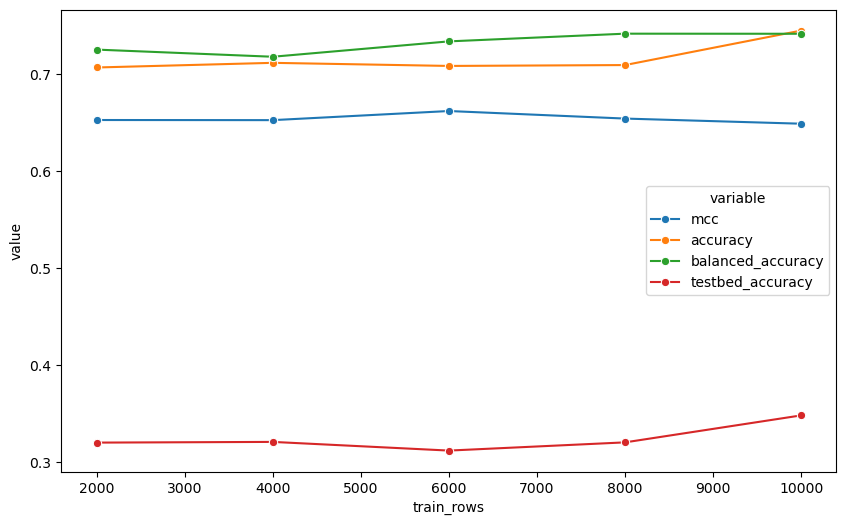

In [25]:
# Melt the DataFrame to have a long format for Seaborn lineplot
melted_stats = stats.melt(id_vars='train_rows',
                          value_vars=['mcc', 'accuracy', 'balanced_accuracy', 'testbed_accuracy'])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_stats, x='train_rows', y='value', hue='variable', marker='o')

In [27]:
stats = pd.DataFrame(columns=['train_rows', 'mcc_unraveled', 'mcc_testbed', 'mcc_combined', 'best_model_combined'])
for train_rows in range(500, 4500, 500):
    merged_training_df = pd.concat([unraveled_train_df[:10000], testbed_train_df[:train_rows]])
    print(train_rows)
    print(len(merged_training_df))
    predictor = TabularPredictor(label='Label', eval_metric= 'mcc').fit(presets='medium', train_data=merged_training_df[unraveled_features], fit_weighted_ensemble=False, included_model_types=['NN_TORCH', 'GBM', 'XGB', 'FASTAI', 'RF', 'XT', 'KNN'])
    
    evaluation_unraveled = predictor.evaluate(unraveled_test_df)
    evaluation_testbed = predictor.evaluate(testbed_test_df)


    combined_leaderboard = predictor.leaderboard(pd.concat([testbed_test_df, unraveled_test_df]))
    combined_evaluation = predictor.evaluate(pd.concat([testbed_test_df, unraveled_test_df]))

    new_row = {'train_rows': train_rows, 'mcc_unraveled':evaluation_unraveled['mcc'], 'mcc_testbed':evaluation_testbed['mcc'], 'mcc_combined': combined_evaluation['mcc'], 'best_model_combined': combined_leaderboard.iloc[0]['model']}
    stats.loc[len(stats)] = new_row
    print(stats)

No path specified. Models will be saved in: "AutogluonModels\ag-20250711_062023"
Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
Memory Avail:       52.27 GB / 63.72 GB (82.0%)
Disk Space Avail:   627.02 GB / 1906.98 GB (32.9%)
Presets specified: ['medium']
Beginning AutoGluon training ...
AutoGluon will save models to "c:\Users\zac\Documents\github\modular_ids_framework\AutogluonModels\ag-20250711_062023"
Train Data Rows:    10500
Train Data Columns: 78
Label Column:       Label
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	4 unique label values:  ['Reconnaissance', 'Lateral Movement', 'Establish Foothold', 'Data Exfiltration']
	If 'multiclass' is not the correct problem_type, 

500
10500


	Useless Original Features (Count: 11): ['vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen_ms']
	Types o

   train_rows  mcc_unraveled  mcc_testbed  mcc_combined best_model_combined
0         500       0.665894     0.882515      0.718751             XGBoost
1000
11000


	Useless Original Features (Count: 11): ['vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen_ms']
	Types o

   train_rows  mcc_unraveled  mcc_testbed  mcc_combined best_model_combined
0         500       0.665894     0.882515      0.718751             XGBoost
1        1000       0.667142     0.960149      0.741431      NeuralNetTorch
1500
11500


	Useless Original Features (Count: 11): ['vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen_ms']
	Types o

   train_rows  mcc_unraveled  mcc_testbed  mcc_combined best_model_combined
0         500       0.665894     0.882515      0.718751             XGBoost
1        1000       0.667142     0.960149      0.741431      NeuralNetTorch
2        1500       0.658639     0.966452      0.739881      NeuralNetTorch
2000
12000


	Useless Original Features (Count: 11): ['vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen_ms']
	Types o

   train_rows  mcc_unraveled  mcc_testbed  mcc_combined best_model_combined
0         500       0.665894     0.882515      0.718751             XGBoost
1        1000       0.667142     0.960149      0.741431      NeuralNetTorch
2        1500       0.658639     0.966452      0.739881      NeuralNetTorch
3        2000       0.647510     0.993459      0.741578             XGBoost
2500
12500


	Useless Original Features (Count: 11): ['vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen_ms']
	Types o

   train_rows  mcc_unraveled  mcc_testbed  mcc_combined best_model_combined
0         500       0.665894     0.882515      0.718751             XGBoost
1        1000       0.667142     0.960149      0.741431      NeuralNetTorch
2        1500       0.658639     0.966452      0.739881      NeuralNetTorch
3        2000       0.647510     0.993459      0.741578             XGBoost
4        2500       0.664775     0.973323      0.743526      NeuralNetTorch
3000
13000


	Useless Original Features (Count: 11): ['vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen_ms']
	Types o

   train_rows  mcc_unraveled  mcc_testbed  mcc_combined best_model_combined
0         500       0.665894     0.882515      0.718751             XGBoost
1        1000       0.667142     0.960149      0.741431      NeuralNetTorch
2        1500       0.658639     0.966452      0.739881      NeuralNetTorch
3        2000       0.647510     0.993459      0.741578             XGBoost
4        2500       0.664775     0.973323      0.743526      NeuralNetTorch
5        3000       0.666551     0.978038      0.745904      NeuralNetTorch
3500
13500


	Useless Original Features (Count: 11): ['vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen_ms']
	Types o

   train_rows  mcc_unraveled  mcc_testbed  mcc_combined best_model_combined
0         500       0.665894     0.882515      0.718751             XGBoost
1        1000       0.667142     0.960149      0.741431      NeuralNetTorch
2        1500       0.658639     0.966452      0.739881      NeuralNetTorch
3        2000       0.647510     0.993459      0.741578             XGBoost
4        2500       0.664775     0.973323      0.743526      NeuralNetTorch
5        3000       0.666551     0.978038      0.745904      NeuralNetTorch
6        3500       0.664989     0.976276      0.744533      NeuralNetTorch
4000
14000


	Useless Original Features (Count: 11): ['vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen_ms']
	Types o

   train_rows  mcc_unraveled  mcc_testbed  mcc_combined best_model_combined
0         500       0.665894     0.882515      0.718751             XGBoost
1        1000       0.667142     0.960149      0.741431      NeuralNetTorch
2        1500       0.658639     0.966452      0.739881      NeuralNetTorch
3        2000       0.647510     0.993459      0.741578             XGBoost
4        2500       0.664775     0.973323      0.743526      NeuralNetTorch
5        3000       0.666551     0.978038      0.745904      NeuralNetTorch
6        3500       0.664989     0.976276      0.744533      NeuralNetTorch
7        4000       0.650603     0.994190      0.743233             XGBoost


<Axes: xlabel='train_rows', ylabel='value'>

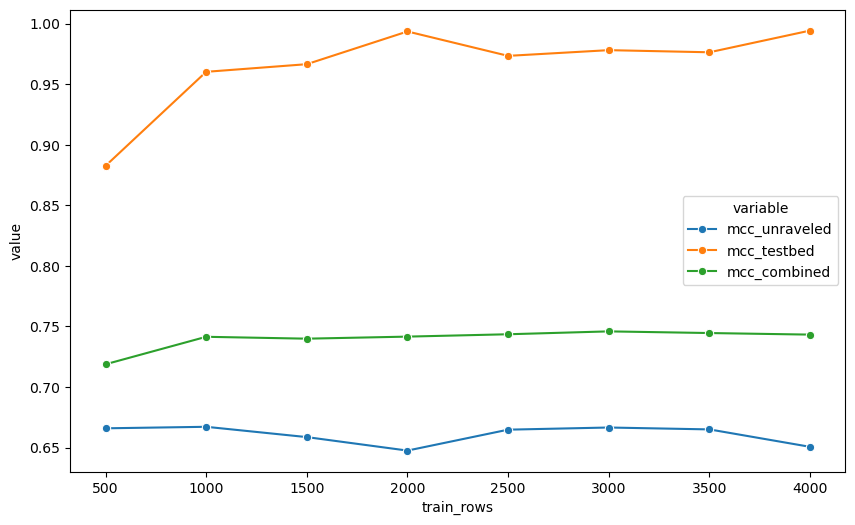

In [29]:
# Melt the DataFrame to have a long format for Seaborn lineplot
melted_stats = stats.melt(id_vars='train_rows',
                          value_vars=['mcc_unraveled', 'mcc_testbed', 'mcc_combined'])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_stats, x='train_rows', y='value', hue='variable', marker='o')

In [30]:
merged_training_df = pd.concat([unraveled_train_df[:10000], testbed_train_df[:2000]])
print(train_rows)
print(len(merged_training_df))
predictor = TabularPredictor(label='Label', eval_metric= 'mcc').fit(presets='medium', train_data=merged_training_df[unraveled_features], fit_weighted_ensemble=False, included_model_types=['NN_TORCH', 'GBM', 'XGB', 'FASTAI', 'RF', 'XT', 'KNN'])

No path specified. Models will be saved in: "AutogluonModels\ag-20250711_062645"
Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
Memory Avail:       51.51 GB / 63.72 GB (80.8%)
Disk Space Avail:   623.77 GB / 1906.98 GB (32.7%)
Presets specified: ['medium']
Beginning AutoGluon training ...
AutoGluon will save models to "c:\Users\zac\Documents\github\modular_ids_framework\AutogluonModels\ag-20250711_062645"
Train Data Rows:    12000
Train Data Columns: 78
Label Column:       Label
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	4 unique label values:  ['Reconnaissance', 'Lateral Movement', 'Establish Foothold', 'Data Exfiltration']
	If 'multiclass' is not the correct problem_type, 

4000
12000


	Useless Original Features (Count: 11): ['vlan_id', 'tunnel_id', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'bidirectional_urg_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused Original Features (Count: 1): ['src2dst_first_seen_ms']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
		These features do not need to be present at inference time.
		('int', []) : 1 | ['src2dst_first_seen_ms']
	Types o

In [31]:
# will return the path to the cloned predictor, identical to save_path_clone_opt
path_clone_opt = predictor.clone_for_deployment(path='persistent_model_finetune')

Cloned TabularPredictor located in 'c:\Users\zac\Documents\github\modular_ids_framework\AutogluonModels\ag-20250711_062645' to 'persistent_model_finetune'.
	To load the cloned predictor: predictor_clone = TabularPredictor.load(path="persistent_model_finetune")
Clone: Keeping minimum set of models required to predict with best model 'XGBoost'...
Deleting model KNeighborsUnif. All files under c:\Users\zac\Documents\github\modular_ids_framework\persistent_model_finetune\models\KNeighborsUnif will be removed.
Deleting model KNeighborsDist. All files under c:\Users\zac\Documents\github\modular_ids_framework\persistent_model_finetune\models\KNeighborsDist will be removed.
Deleting model NeuralNetFastAI. All files under c:\Users\zac\Documents\github\modular_ids_framework\persistent_model_finetune\models\NeuralNetFastAI will be removed.
Deleting model LightGBMXT. All files under c:\Users\zac\Documents\github\modular_ids_framework\persistent_model_finetune\models\LightGBMXT will be removed.
Del